In [40]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

<h2>Functions</h2>

In [28]:
def plot_boxplot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.set_ylabel('ROAS')
    
    sns.boxplot(data=data, x=x_col, y=y_col)
    plt.axhline(y=1, color='r', linestyle='--', label='ROAS = 1')
    plt.xticks(rotation=90)
    plt.semilogy()

<h2>Main</h2>

In [29]:
folder_path = r'C:\Users\Rafael_Fagundes\Downloads\compiled_data_v2.csv'

df = pd.read_csv(folder_path)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782917 entries, 0 to 1782916
Data columns (total 49 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Unnamed: 0                                   int64  
 1   Audience Type                                object 
 2   Tactic                                       object 
 3   Media Buy Name                               object 
 4   Campaign Name                                object 
 5   Fiscal Quarter                               object 
 6   Fiscal Week                                  object 
 7   Country_x                                    object 
 8   Display Funnel Mapped                        object 
 9   Display Dell Vehicle Mapped                  object 
 10  Display Business Unit Mapped                 object 
 11  Display Site Name Mapped                     object 
 12  Audience Type Name                           object 
 13  Impressions 

In [46]:
filtered_df = df[(df['Country_x'] == 'United States')
                & (df['Audience Type'] == '3PD')
                & (df['BU'] == 'CSB')
                & (df['Fiscal Quarter'] == '2024-Q3')]

In [47]:
grouped_df = filtered_df.groupby(
                                    ['Audience Type Name'
                                     ,'Media Buy Name'
                                     ]).agg({
                                          'Spend': 'sum'
                                        , 'Net Rev': 'sum'
                                      }).reset_index()

grouped_df['ROAS'] = grouped_df['Net Rev'] / grouped_df['Spend']
grouped_df = grouped_df.round(decimals=2, out=None)

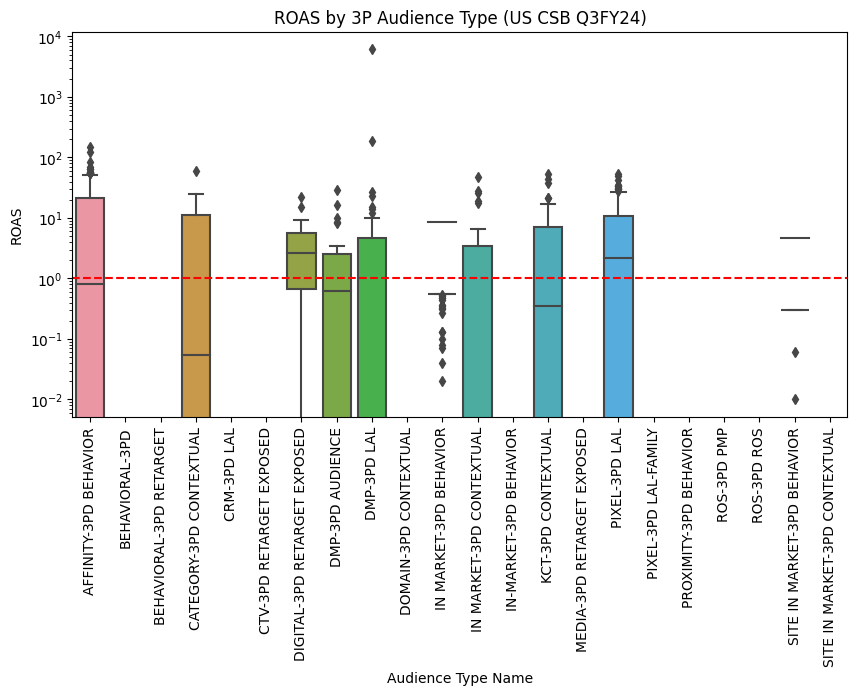

In [52]:
plot_boxplot(grouped_df, 'Audience Type Name', 'ROAS', 'ROAS by 3P Audience Type (US CSB Q3FY24)')

<h2>Export File</h2>

In [50]:
grouped_df.head()

,Audience Type Name,Media Buy Name,Spend,Net Rev,ROAS
0,AFFINITY-3PD BEHAVIOR,ADOBE ADS_AFFINITY-3PD BEHAVIOR_VID IN-STREAM_15 SEC_DCPM_MSFT JS HOME OEM+WIN_STD_FY24Q2_NA_Grapeshot-Contextual-OnDemand_Desktop,0.0,0.00,NaN
1,AFFINITY-3PD BEHAVIOR,ADOBE ADS_AFFINITY-3PD BEHAVIOR_VID IN-STREAM_15 SEC_DCPM_MSFT JS HOME OEM+WIN_STD_FY24Q2_NA_Grapeshot-Contextual-OnDemand_Mobile,0.0,298.98,inf
2,AFFINITY-3PD BEHAVIOR,ADOBE ADS_AFFINITY-3PD BEHAVIOR_VID IN-STREAM_30 SEC_DCPM_MSFT JS HOME OEM+WIN_STD_FY24Q2_NA_Grapeshot-Contextual-OnDemand_Mobile,0.0,0.00,NaN
3,AFFINITY-3PD BEHAVIOR,AMAZON_AFFINITY-3PD BEHAVIOR_HTML5 BANNER_160x600_DCPM_INTEL CCF_STD_FY24Q2_NA_Business Customer_Desktop,0.0,0.00,NaN
4,AFFINITY-3PD BEHAVIOR,AMAZON_AFFINITY-3PD BEHAVIOR_HTML5 BANNER_160x600_DCPM_INTEL CCF_STD_FY24Q2_NA_Business Customer_Desktop-Amazon-Vostro,0.0,9282.07,inf


In [51]:
grouped_df.to_csv('csv/US_CSB_Q3FY24_3P_Placements.csv')